In [1]:
# imports numpy, matplotlib
import numpy as np 
import matplotlib.pyplot as plt
import ThermalDiffusion as TS
from scipy.integrate import solve_ivp

In [2]:
# variable setup

# room temperature
T_air = 23 #dgree C

# duration of the graph staring at t0 = 0  to tf = t0 + dur
dur = 400# s


"""
Experiment Constants
"""

# heat input
Q = 0.43628157956086594 #J

# thermal conductivity 
kappa = 4.01 # W cm^-1 K^-1
k_al = 2.37 # W cm^-1 K^-1
# volumetric heat capacity 
s =3.45 # J m^-2 K^-1
s_al = 2.422# J m^-2 K^-1
# delta x
dx = 0.1# cm
# delta t
dt = 0.001 # sec
# heater length
heaterLen = 1
# heat pulse duration
att = 0.5 #sec
# energy input set using raw data later
 # J

"""
ROD Conditions
"""
# length of rod
rodLen = 22 # cm
# radius of the cross section area
a =0.5*(1/8)*2.54  # cm
# cross section area
A = np.pi * a**2 # cm^2

# inital temperature of rod
ic =T_air

# boundary conditions
bcT = np.zeros((2,1))
bcS = np.zeros((2,1))

# Left end boundary conditions
# initial temperature 
bcT[0] = ic
# diffusion state
# 1) heat sunk
# 2) float
bcS[0] = 1

# Right end boundary conditions
# initial temperature 
bcT[1] = ic
# diffusion state
# 1) heat sunk
# 2) float
bcS[1] = 1

# heatloss 
heatlossBool = True

# position of heater
atX = rodLen/2


# time domain (for ploting and analytical method )
t = np.arange(0,dur,dt)


# convectiveHeatTransfer factor
h =0.0003



In [3]:
y= TS.numMetVec(dur,rodLen,dt,dx,kappa,att,atX,heaterLen,bcT,ic,h,heatlossBool,Q,a,s,bcS) 

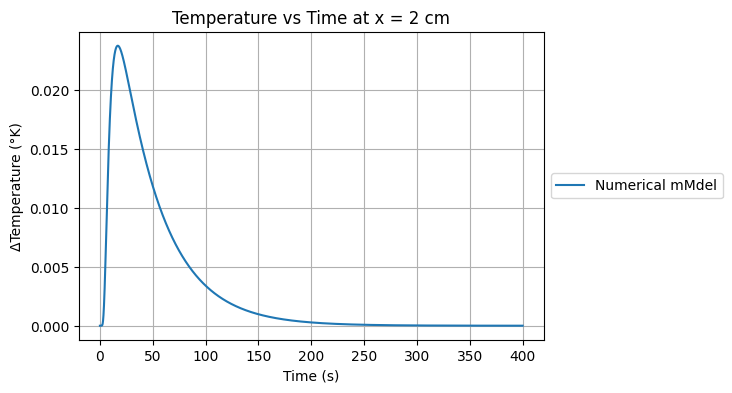

In [4]:
# position of the rod where you want to see the temp vs time graph
d = 2 # cm

plt.figure(figsize=(6, 4))
plt.plot(t,y[int(d/dx),:],label = 'Numerical mMdel')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("Time (s)")
plt.ylabel("ΔTemperature (°K)")
plt.title("Temperature vs Time at x = 2 cm")
plt.grid()

In [5]:
y.shape

(220, 400000)

In [7]:
# Now the PDE constants:
beta = kappa/(s*dx**2) # converted to SI units.
gamma = 1/s


delta = 2*h/(s*a)
#delta = 0  # no heat loss

# This is the heater.  Translated from Yash's code.
N = int(rodLen/dx)

x = np.arange(0,rodLen,dx) +dx/2 -rodLen/2 

# x = np.arange(0,rodLen,dx) #+dx/2 -rodLen/2 #positions along the rod, centered about zero.
num_seg = sum(abs(x)<= heaterLen/2) # number of segments that have the heater
x_h = np.zeros(len(x))
#I want to define a vector that is zeros and ones, one for the location of the heater.
# Heater is in the center of the rod.
x_h[int((N-num_seg)/2):int((N+num_seg)/2)]=1
vol_h = np.pi*num_seg*dx*a**2 

#My model needs the power per volume.
P = Q/att    # Power in Watts.  att is the pulse time.
# The following is a vector with the power/volume in each heater segment.
x_h = x_h*(P/vol_h)
# Initial conditions
y_0 = np.zeros(N)
t_start = 0
t_stop = dur

tspan = [t_start, t_stop]

bcS = np.zeros((2,1))
bcS[0] = 0
bcS[1] = 0
sol1_20cm20s = solve_ivp(TS.numMCS_helper, tspan, y_0, args= (beta, gamma, delta, x_h, att, bcS))

In [8]:

ans = TS.numMCS(dur,rodLen,dt,dx,kappa,att,atX,heaterLen,bcT,ic,h,heatlossBool,Q,a,s,bcS) 

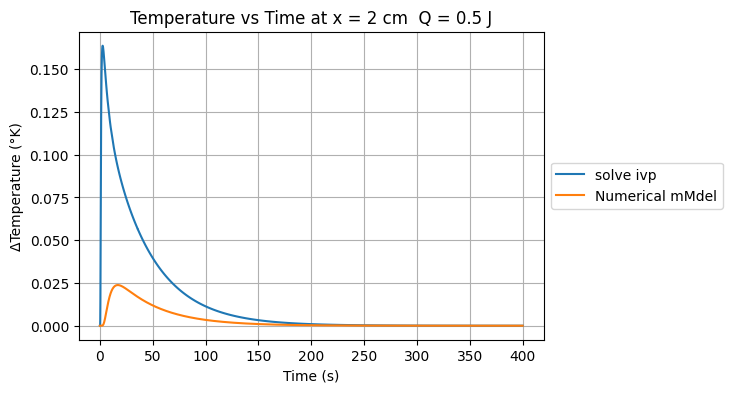

In [11]:
# position of the rod where you want to see the temp vs time graph
d = 2 # cm

plt.figure(figsize=(6, 4))
plt.plot(sol1_20cm20s.t,sol1_20cm20s.y[int((rodLen/(2*dx))+((d+0.3)/dx))],label = 'solve ivp')
# plt.plot(ans.t,ans.y[int((rodLen/(2*dx))+((d+0.3)/dx))],label = 'solve ivp')
plt.plot(t,y[int(d/dx),:],label = 'Numerical mMdel')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("Time (s)")
plt.ylabel("ΔTemperature (°K)")
plt.title("Temperature vs Time at x = 2 cm  Q = 0.5 J")
plt.grid()